<a href="https://colab.research.google.com/github/amulyaojha11/Temperature-Prediction-of-Indian-Cities/blob/main/Prediction/Chennai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ARIMA and Seasonal ARIMA**

**Autoregressive Integrated Moving Averages**

The general process for ARIMA models is the following:



*   Visualize the Time Series Data
*   Make the time series data stationary
*   Plot the Correlation and AutoCorrelation Charts
*   Construct the ARIMA Model or Seasonal ARIMA based on the data
*   Use the model to make predictions




In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('Chennai.csv')

In [5]:
df.head()

,Date,Temperature
0,2009-01-01,25.1
1,2009-02-01,26.6
2,2009-03-01,28.5
3,2009-04-01,30.8
4,2009-05-01,32.1


In [6]:
df.tail()

,Date,Temperature
122,2019-03-01,29.9
123,2019-04-01,31.8
124,2019-05-01,33.2
125,2019-06-01,33.6
126,2019-07-01,31.6


In [8]:
# Convert Month into Datetime Format from string format
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df.head()

,Date,Temperature
0,2009-01-01,25.1
1,2009-02-01,26.6
2,2009-03-01,28.5
3,2009-04-01,30.8
4,2009-05-01,32.1


In [10]:
df.set_index('Date',inplace=True) #set date as index

In [11]:
df.head()

,Temperature
Date,
2009-01-01,25.1
2009-02-01,26.6
2009-03-01,28.5
2009-04-01,30.8
2009-05-01,32.1


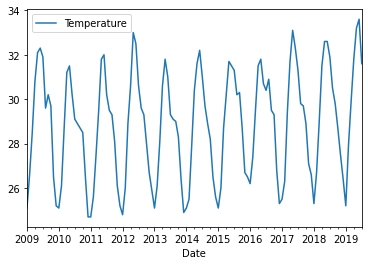

In [12]:
df.plot()

In [13]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
test_result=adfuller(df['Temperature'])

In [15]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(Temperature):
    result=adfuller(Temperature)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [16]:
adfuller_test(df['Temperature'])

ADF Test Statistic : -0.7286056206046474
p-value : 0.8392002637998224
#Lags Used : 10
Number of Observations Used : 116
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


**Differencing**

In [17]:
df['Temperature First Difference'] = df['Temperature'] - df['Temperature'].shift(1)

In [19]:
df['Seasonal First Difference']=df['Temperature']-df['Temperature'].shift(12)

In [ ]:
df.head(14)

,Temperature,Temperature First Difference,Seasonal First Difference
Date,,,
2009-01-01,25.1,NaN,NaN
2009-02-01,26.6,1.5,NaN
2009-03-01,28.5,1.9,NaN
2009-04-01,30.8,2.3,NaN
2009-05-01,32.1,1.3,NaN
2009-06-01,32.3,0.2,NaN
2009-07-01,31.9,-0.4,NaN
2009-08-01,29.6,-2.3,NaN
2009-09-01,30.2,0.6,NaN


In [20]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.2684872693439093
p-value : 0.016347216198818817
#Lags Used : 12
Number of Observations Used : 102
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


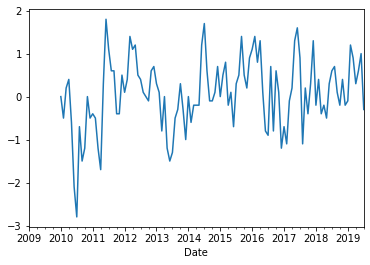

In [21]:
df['Seasonal First Difference'].plot()

**Auto Regressive Model**

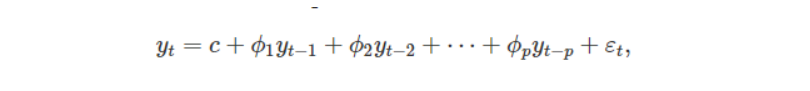

In [22]:
import pandas

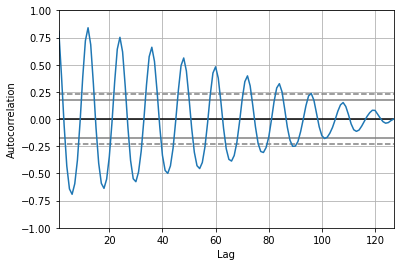

In [23]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Temperature'])
plt.show()

**Final Thoughts on Autocorrelation and Partial Autocorrelation**



Identification of an AR model is often best done with the PACF.
*  For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
   
Identification of an MA model is often best done with the ACF rather than the PACF.

*   For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.


3 values in ARIMA -p,d,q. p specifies the AR model lags, d specifies the differencing and q specifies MA lags.



In [24]:
import statsmodels as sm

In [25]:
import statsmodels.api as sm

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

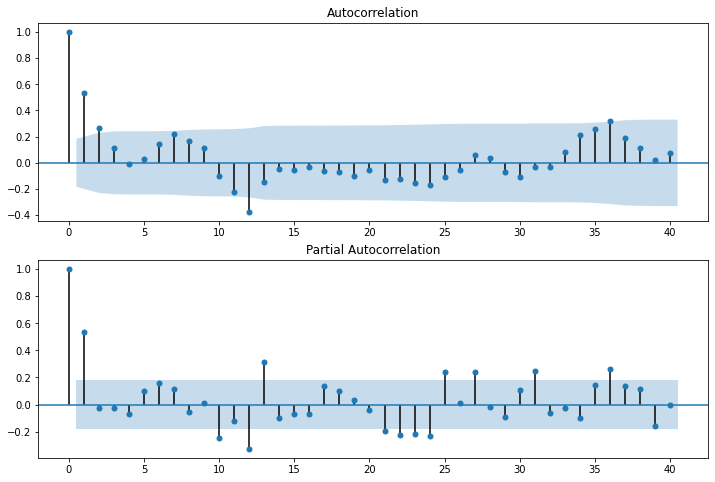

In [27]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

#**Train the model**

In [28]:
from statsmodels.tsa.arima_model import ARIMA

In [30]:
model=ARIMA(df['Temperature'],order=(2,1,2))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Temperature   No. Observations:                  126
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -221.476
Method:                       css-mle   S.D. of innovations              1.389
Date:                Thu, 18 Nov 2021   AIC                            450.951
Time:                        15:20:26   BIC                            462.296
Sample:                    02-01-2009   HQIC                           455.560
                         - 07-01-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0187      0.018      1.033      0.304      -0.017       0.054
ar.L1.D.Temperature     0.8318      0.053     15.664      0.000       0.728       0.936
ma.L1.D.Temperature    -0.9999      0.019    -51.298      0.000      -1.038      -0.962
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2022           +0.0000j            1.2022            0.0000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

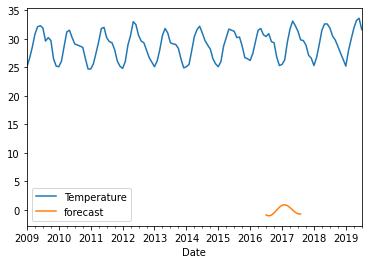

In [41]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Temperature','forecast']].plot()

In [42]:
import statsmodels.api as sm

In [61]:
model=sm.tsa.statespace.SARIMAX(df['Temperature'],order=(2, 1, 2),seasonal_order=(2,1,2,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [62]:
future_datest_df.tail()

,Temperature,Temperature First Difference,Seasonal First Difference,forecast
2021-02-01,NaN,NaN,NaN,NaN
2021-03-01,NaN,NaN,NaN,NaN
2021-04-01,NaN,NaN,NaN,NaN
2021-05-01,NaN,NaN,NaN,NaN
2021-06-01,NaN,NaN,NaN,NaN


#**Test the model**

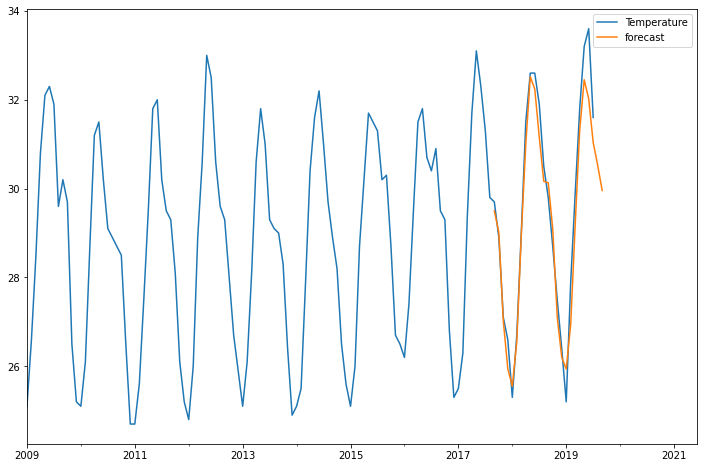

In [60]:
future_df['forecast'] = results.predict(start = 104, end = 128, dynamic= True)  
future_df[['Temperature', 'forecast']].plot(figsize=(12, 8)) 

##**Predicting future values**

In [50]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [51]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [52]:
future_df=pd.concat([df,future_datest_df])

In [53]:
future_datest_df.tail()

,Temperature,Temperature First Difference,Seasonal First Difference,forecast
2021-02-01,NaN,NaN,NaN,NaN
2021-03-01,NaN,NaN,NaN,NaN
2021-04-01,NaN,NaN,NaN,NaN
2021-05-01,NaN,NaN,NaN,NaN
2021-06-01,NaN,NaN,NaN,NaN


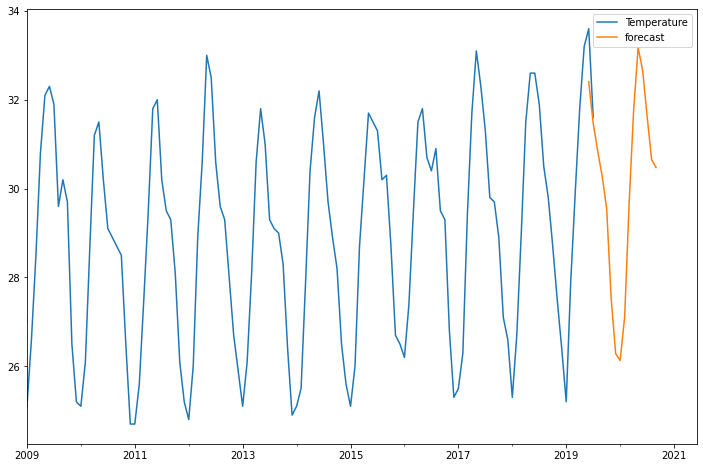

In [64]:
future_df['forecast'] = results.predict(start = 125, end = 140, dynamic= True)  
future_df[['Temperature', 'forecast']].plot(figsize=(12, 8))